In [22]:
from fpdf import FPDF
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.figure_factory as pff
import plotly.subplots as sp

In [23]:
df = pandas.read_csv('../data_clean/StudentsPerformance.csv', index_col=0)
df.info()
df_gender_scores=df[["gender", "math_score", "reading_score", "writing_score"]]

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_or_ethnicity            1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.3+ KB


In [17]:
# Gender Distribution given in the data set
gender_percent=px.pie(values=df.gender.value_counts(), names=df.gender.unique(), title="Gender")
gender_percent.update_traces(textposition='inside', textinfo='percent+label')
# race ethnicity distribution given in the data set
race_ethnicity_percent=px.pie(values=df['race_or_ethnicity'].value_counts(), names=df['race_or_ethnicity'].unique(), title="race/ethnicity")
race_ethnicity_percent.update_traces(textposition='inside', textinfo='percent+label')
#parents education level distribution in the given data set
parents_education_percent=px.pie(values=df['parental_level_of_education'].value_counts(), names=df['parental_level_of_education'].unique(), title="Parents Education Level")
parents_education_percent.update_traces(textposition='inside', textinfo='percent+label')
lunch_type_percent=px.pie(values=df['lunch'].value_counts(), names=df['lunch'].unique(), title="lunch")
lunch_type_percent.update_traces(textposition='inside', textinfo='percent+label')
figures = [
            gender_percent,
            race_ethnicity_percent,
    parents_education_percent,
    lunch_type_percent
    
    ]

fig = sp.make_subplots(rows=1, cols=len(figures), specs=[[{"type": "domain"},{"type": "domain"}, {"type": "domain"},{"type": "domain"}]]) 

for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=1, col=i+1)
        
fig.show()

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



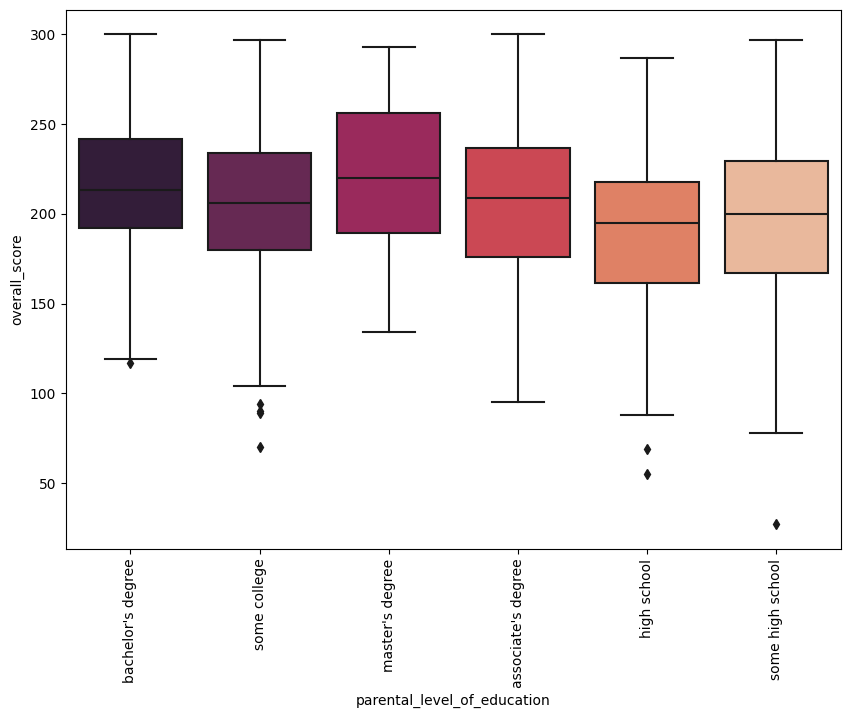

In [9]:
fig=plt.figure(figsize=(10,7))
df['overall_score']=df['math_score']+df['reading_score']+df['writing_score']
plt.xticks(rotation=90)
ax = sns.boxplot(data=df,y='overall_score',x='parental_level_of_education',palette='rocket')
fig = ax.get_figure()
fig.savefig("../results/parental_level_of_education.png")

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version.

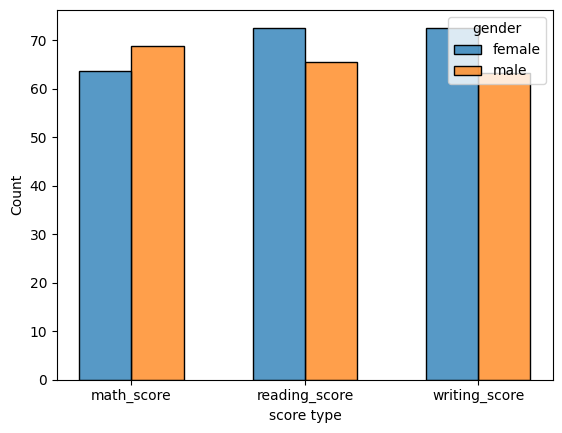

In [10]:
dfm = df_gender_scores.melt(id_vars='gender',var_name ='score type', value_name ='mean score')
df_mean = dfm.groupby(['gender', 'score type']).mean()
ax = sns.histplot(data=df_mean, x='score type', weights='mean score', hue='gender',multiple="dodge", shrink=.6)
plt.savefig('../results/gender_vs_scores.png')

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version.

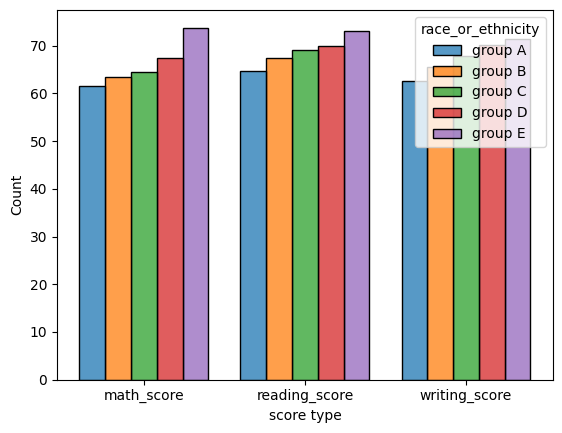

In [12]:
df_race_score=df[["race_or_ethnicity", "math_score", "reading_score", "writing_score"]]
dfm = df_race_score.melt(id_vars='race_or_ethnicity',var_name ='score type', value_name ='mean score')
df_mean = dfm.groupby(['race_or_ethnicity', 'score type']).mean()
ax = sns.histplot(data=df_mean, x='score type', weights='mean score', hue='race_or_ethnicity',multiple="dodge", shrink=.8)
plt.savefig('../results/race_ethnicity_vs_scores.png')

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version.

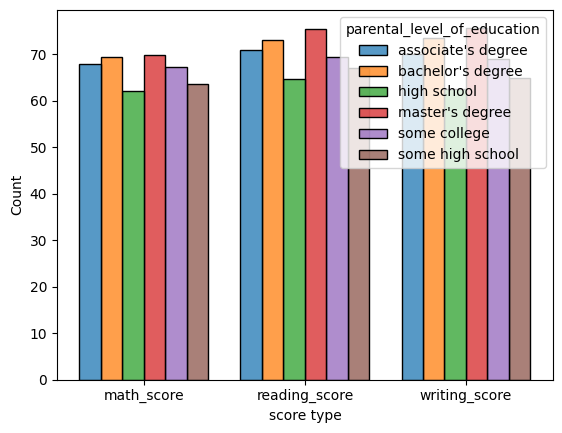

In [13]:
df_parent_score=df[["parental_level_of_education", "math_score", "reading_score", "writing_score"]]
dfm = df_parent_score.melt(id_vars='parental_level_of_education',var_name ='score type', value_name ='mean score')
df_mean = dfm.groupby(['parental_level_of_education', 'score type']).mean()
ax = sns.histplot(data=df_mean, x='score type', weights='mean score', hue='parental_level_of_education',multiple="dodge", shrink=.8)
plt.savefig('../results/race_ethnicity_vs_scores.png')

In [43]:
df["Average"]=(df["math_score"]+df["reading_score"]+df["writing_score"])/3
print(df["Average"])

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Average, Length: 1000, dtype: float64


In [44]:
def Grade(Average):
    if (Average >= 95):return 'O'
    if (Average >= 81):return 'A'
    if (Average >= 71):return 'B'
    if (Average >= 61):return 'C'
    if (Average >= 51):return 'D'
    if (Average >= 41):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["Average"]),axis=1)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version.

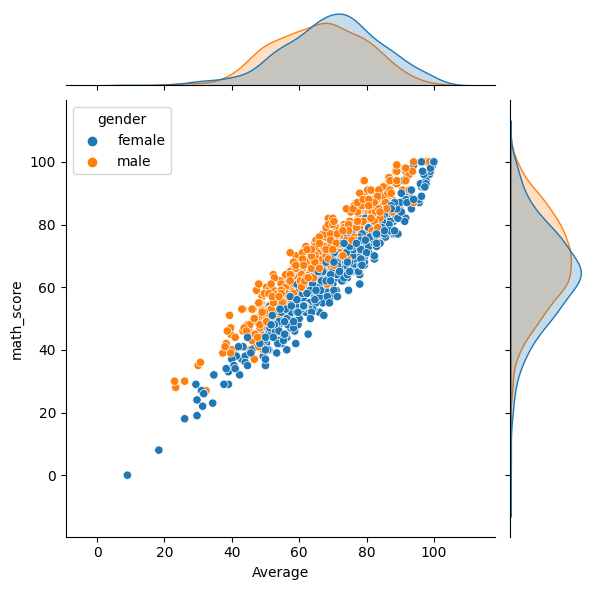

In [48]:
sns.jointplot(x ='Average', y ='math_score', hue='gender', data = df)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version.

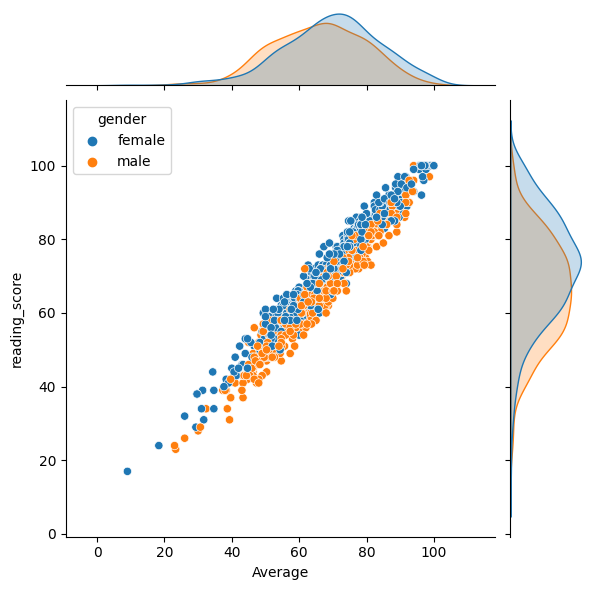

In [50]:
sns.jointplot(x = 'Average', y = 'reading_score', hue = 'gender', data = df)